In [40]:
import pandas as pd
import random
import numpy as np
import matplotlib.pyplot as plt

In [8]:
data = pd.read_csv("data.csv")
data.head()


,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,5/2/2014 0:00,313000.0,3,1.50,1340.0,7912.0,1.5,0.0,0.0,3.0,1340.0,0.0,1955.0,2005.0,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,5/2/2014 0:00,2384000.0,5,2.50,3650.0,9050.0,2.0,0.0,4.0,5.0,3370.0,280.0,1921.0,0.0,709 W Blaine St,Seattle,WA 98119,USA
2,5/2/2014 0:00,342000.0,3,2.00,1930.0,11947.0,1.0,0.0,0.0,4.0,1930.0,0.0,1966.0,0.0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,5/2/2014 0:00,420000.0,3,2.25,2000.0,8030.0,1.0,0.0,0.0,4.0,1000.0,1000.0,1963.0,0.0,857 170th Pl NE,Bellevue,WA 98008,USA
4,5/2/2014 0:00,550000.0,4,2.50,1940.0,10500.0,1.0,0.0,0.0,4.0,1140.0,800.0,1976.0,1992.0,9105 170th Ave NE,Redmond,WA 98052,USA


In [9]:
data.count()


date             4600
price            4600
bedrooms         4600
bathrooms        4598
sqft_living      4597
sqft_lot         4597
floors           4597
waterfront       4597
view             4596
condition        4598
sqft_above       4598
sqft_basement    4594
yr_built         4599
yr_renovated     4598
street           4594
city             4598
statezip         4595
country          4598
dtype: int64

In [39]:
def suffle_index_gen(data, divide):
    np.random.seed(42)
    suffle_idx = np.random.permutation(len(data))
    size = int(len(data) * divide)
    test_data = suffle_idx[:size]
    train_data = suffle_idx[size:]
    print(suffle_idx)
    return (data.iloc[test_data]), (data.iloc[train_data])

datato_test, datato_train = suffle_index_gen(data, 0.2)
# datato_test.to_csv("testwr.csv", index=False)
# datato_train.to_csv("trainwr.csv", index=False)

[3683 4411 2584 ... 3092 3772  860]


(array([3.201e+03, 8.800e+02, 4.060e+02, 8.100e+01, 2.000e+01, 4.000e+00,
        0.000e+00, 0.000e+00, 1.000e+00, 1.000e+00]),
 array([   0.,  482.,  964., 1446., 1928., 2410., 2892., 3374., 3856.,
        4338., 4820.]),
 <BarContainer object of 10 artists>)

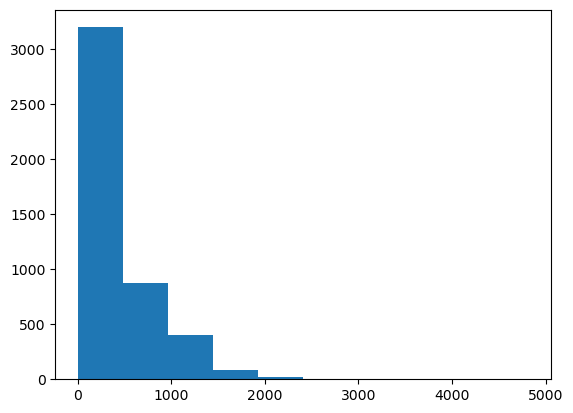

In [46]:
plt.hist(data["sqft_basement"])

In [89]:
data["type_area"] = pd.cut(data["sqft_basement"], bins=[0,500,1000,1500,2000,np.infty], labels=[1,2,3,4,5]).cat.add_categories([0]).fillna(0)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country,type_area
0,5/2/2014 0:00,313000.0,3,1.50,1340.0,7912.0,1.5,0.0,0.0,3.0,1340.0,0.0,1955.0,2005.0,18810 Densmore Ave N,Shoreline,WA 98133,USA,0
1,5/2/2014 0:00,2384000.0,5,2.50,3650.0,9050.0,2.0,0.0,4.0,5.0,3370.0,280.0,1921.0,0.0,709 W Blaine St,Seattle,WA 98119,USA,1
2,5/2/2014 0:00,342000.0,3,2.00,1930.0,11947.0,1.0,0.0,0.0,4.0,1930.0,0.0,1966.0,0.0,26206-26214 143rd Ave SE,Kent,WA 98042,USA,0
3,5/2/2014 0:00,420000.0,3,2.25,2000.0,8030.0,1.0,0.0,0.0,4.0,1000.0,1000.0,1963.0,0.0,857 170th Pl NE,Bellevue,WA 98008,USA,2
4,5/2/2014 0:00,550000.0,4,2.50,1940.0,10500.0,1.0,0.0,0.0,4.0,1140.0,800.0,1976.0,1992.0,9105 170th Ave NE,Redmond,WA 98052,USA,2


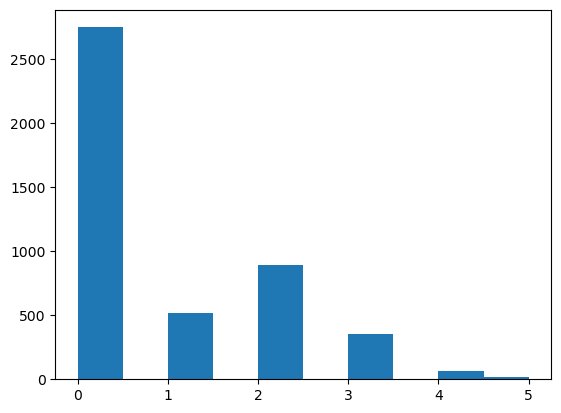

In [90]:
plt.hist(data["type_area"])
data.head()

<Axes: xlabel='type_area'>

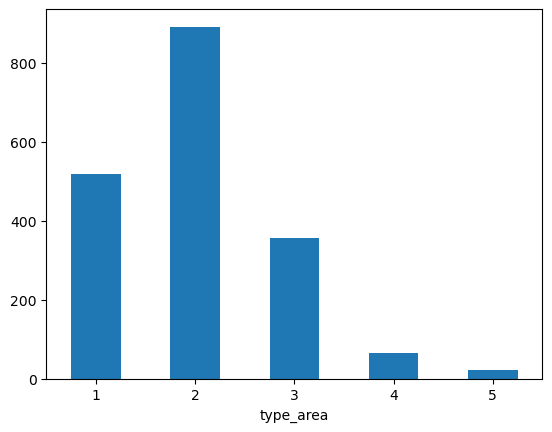

In [80]:
data["type_area"].value_counts().sort_index().plot.bar(rot=0)

In [91]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for test_ix, train_ix in split.split(data, data["type_area"]):
    Stratified_traindata = data.loc[train_ix]
    Stratified_testingdata = data.loc[test_ix]

In [93]:
Stratified_traindata

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country,type_area
4429,5/28/2014 0:00,532500.0,2,1.75,2050.0,11900.0,1.0,0.0,0.0,4.0,2050.0,0.0,1950.0,1983.0,1149-1199 91st Ave NE,Bellevue,WA 98004,USA,0
3218,6/24/2014 0:00,510000.0,3,2.25,1420.0,1309.0,3.0,0.0,0.0,3.0,1420.0,0.0,2006.0,0.0,3821-3825 Whitman Ave N,Seattle,WA 98103,USA,0
1466,5/28/2014 0:00,820000.0,3,2.50,2510.0,5503.0,2.0,0.0,2.0,3.0,2510.0,0.0,1995.0,0.0,6736 40th Ave SW,Seattle,WA 98136,USA,0
2895,6/19/2014 0:00,310000.0,4,1.50,1220.0,9600.0,1.0,0.0,0.0,3.0,1220.0,0.0,1980.0,0.0,4201 Regal St,Carnation,WA 98014,USA,0
1246,5/23/2014 0:00,449950.0,3,2.00,1560.0,4080.0,2.0,0.0,0.0,3.0,1560.0,0.0,1923.0,1982.0,828 NE 83rd St,Seattle,WA 98115,USA,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1033,5/20/2014 0:00,440000.0,3,1.50,1270.0,1443.0,3.0,0.0,0.0,3.0,1270.0,0.0,2007.0,0.0,9608 Roosevelt Way NE,Seattle,WA 98115,USA,0
4585,7/7/2014 0:00,486895.0,3,1.00,1890.0,3330.0,1.5,0.0,0.0,4.0,1390.0,500.0,1901.0,0.0,4324 Dayton Ave N,Seattle,WA 98103,USA,1
2881,6/19/2014 0:00,335000.0,4,2.00,2030.0,103672.0,1.0,0.0,0.0,4.0,2030.0,0.0,1969.0,0.0,27610 SE Mud Mountain Rd,Enumclaw,WA 98022,USA,0
1439,5/28/2014 0:00,840000.0,4,2.75,3040.0,2800.0,2.0,0.0,0.0,3.0,2100.0,940.0,1906.0,2014.0,318 E Mercer St,Seattle,WA 98102,USA,2


(array([550.,   0., 104.,   0., 178.,   0.,  71.,   0.,  13.,   4.]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <BarContainer object of 10 artists>)

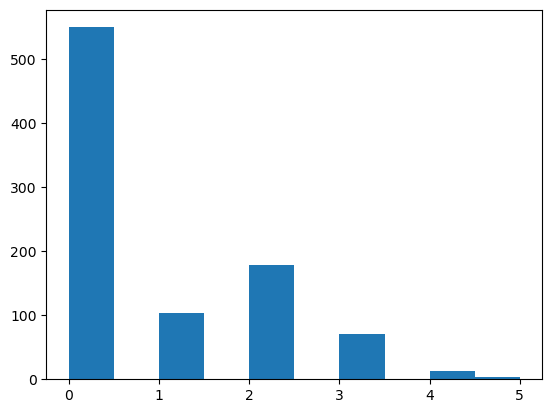

In [96]:
plt.hist(Stratified_traindata['type_area'])